<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M4L1_Machine_learning_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning algorithms

[PPT M4L1 ENG](https://docs.google.com/presentation/d/1Tj5B0OZNhR10tQcsDX58jBIWXvt8AfcfoE0NnMY6Oss/edit?usp=sharing)



# Discussions

## A/B Testing

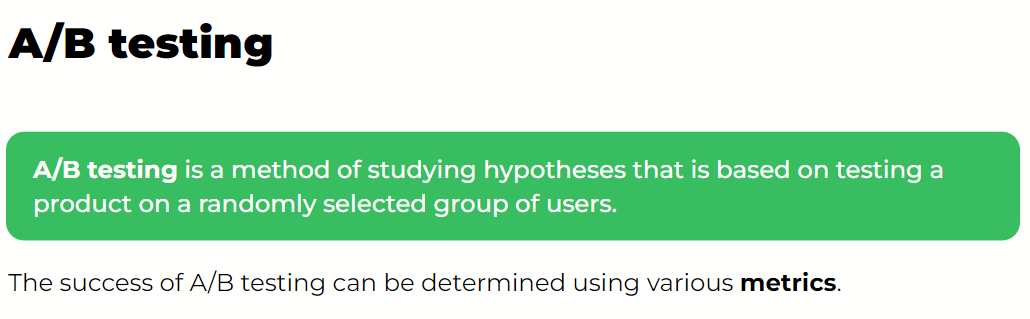

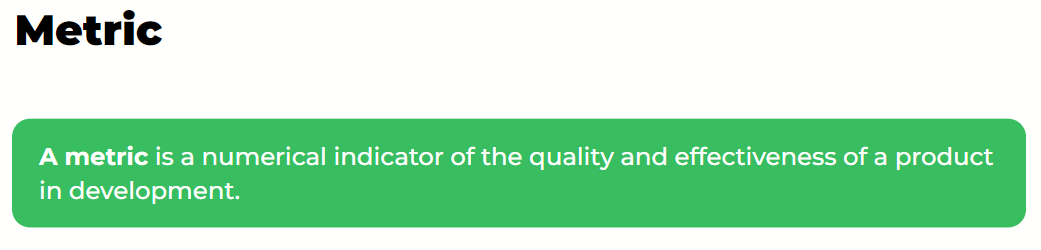

## Machine Learning

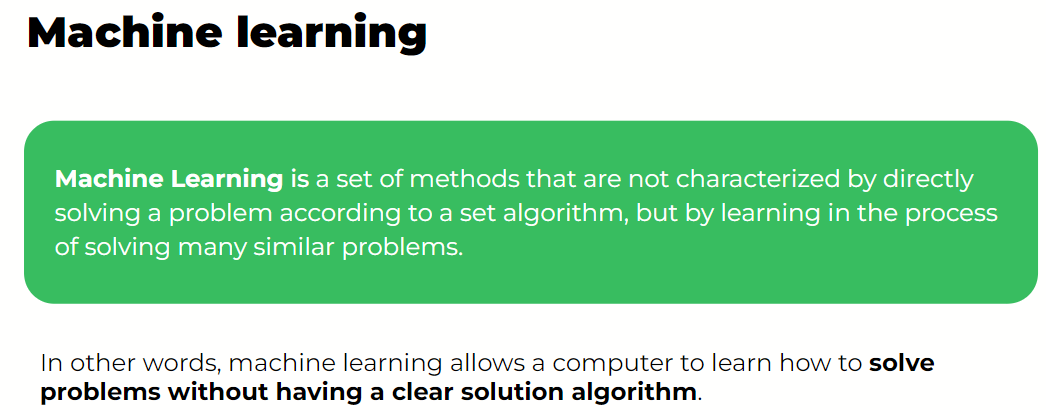

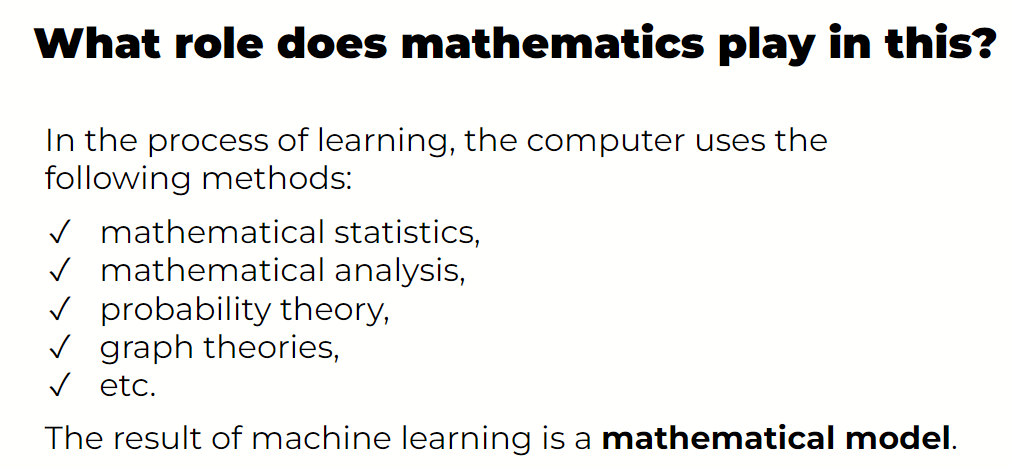

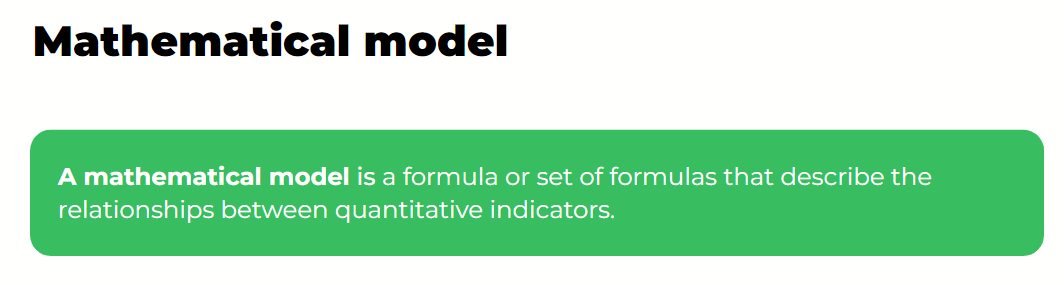

# Creating a model based on a classification algorithm

**Task : Develop a mathematical model predicting the fate of the passengers on the steamship Titanic.**


In [57]:
# get dataset
import pandas as pd

df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Passenger data

1. PassengerId is the sequence number in the DataFrame.
2. Survived — whether the passenger survived or not (0 = no, 1 = yes).
3. Pclass — the cabin class.
4. Name — the passenger's name.
5. Sex — the gender of the passenger.
6. Age — the age of the passenger.
7. SibSp — the total number of brothers, sisters, and spouses of the passenger who traveled with them on board the Titanic.
8. Parch —  the total number of parents and children of the passenger who traveled with them on board the Titanic.
9. Ticket — the ticket number.
10. Fare — the ticket price.
11. Cabin — the cabin number.
12. Embarked — the port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).





## What characteristics can influence whether a passenger will be saved or not?

Women, children, and first-class passengers are more likely to survive.

*Passengers who did not travel alone had a better chance of being rescued.

**Cabins located on the upper decks are closest to the lifeboats, so the passengers staying in those cabins are more likely to survive.


In [58]:
'''Women, children, and first-class passengers are more likely to survive.'''

# mencari rata2 (presentase) survived antara male and female
df.groupby(by='Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [59]:
'''Passengers who did not travel alone had a better chance of being rescued.'''

df.pivot_table(
    index = 'Survived',
    columns = 'Pclass',
    values = 'Age',
    aggfunc = 'mean'
    )

# the average age of survivors is lower than the average age of those who died
#  (due to the rescued children);
# older passengers traveled in a more comfortable cabin class.


Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


## Clean Data

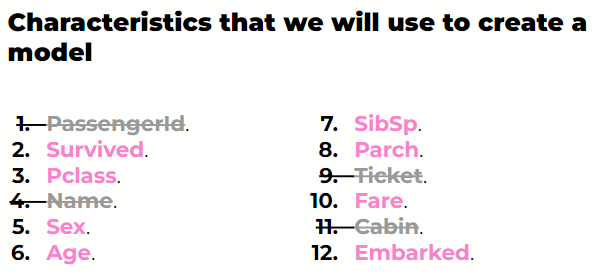

In [60]:
# df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#  method drop() untuk hapus kolom
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Embarked

null --> most data

In [62]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [64]:
df['Embarked'].fillna('S', inplace=True)

In [65]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Age

null --> median age tiap pclass

In [67]:
df.groupby(by='Pclass')['Age'].median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


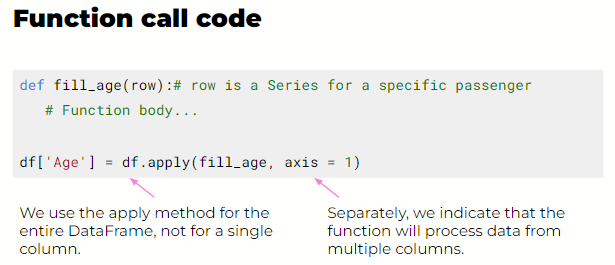

In [69]:
'''
You can calculate the median age of passengers in each class,
and fill in the empty values with that data.
'''

# age_1 = df[df['Pclass'] == 1]['Age'].median()
# age_2 = df[df['Pclass'] == 2]['Age'].median()
# age_3 = df[df['Pclass'] == 3]['Age'].median()

age1 = df[df['Pclass'] == 1]['Age'].median()
age2 = df[df['Pclass'] == 2]['Age'].median()
age3 = df[df['Pclass'] == 3]['Age'].median()

def fill_age(row):
  if pd.isnull(row['Age']): # kolom age null
    if row['Pclass'] == 1:
      return age1
    elif row['Pclass'] == 2:
      return age2
    else:
      return age3
  else:
    return row['Age']


# apply function
df['Age'] = df.apply(fill_age, axis = 1)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Sex --> number

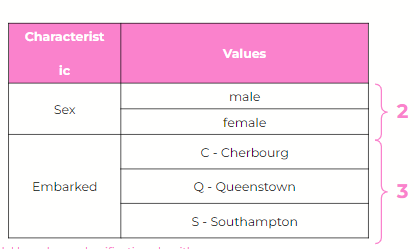

In [71]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [72]:
'''
Let's use the values 0 and 1 to indicate the gender of the passenger.
For example, 0 is female, 1 is male, or vice versa.
'''

def fill_sex(sex):
    if sex == 'female':
      return 0
    else:
      return 1

df['Sex'] = df['Sex'].apply(fill_sex)

In [73]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


### Embarked --> number

In [74]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


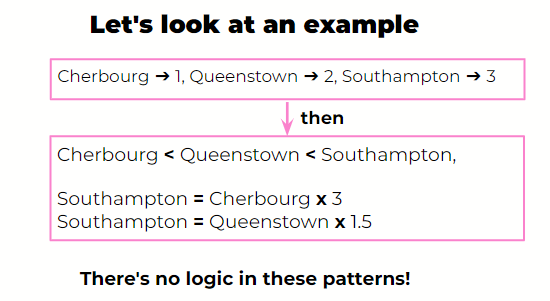

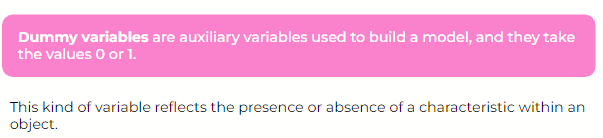

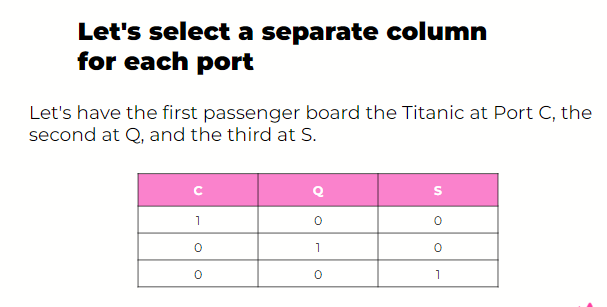

In [75]:
# create dummy variables
pd.get_dummies(df['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


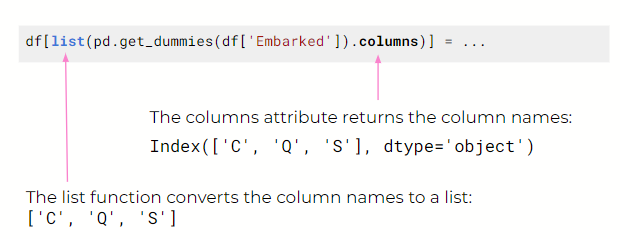

In [76]:
# new columns --> dummy variables
df[list(pd.get_dummies(df['Embarked']).columns)] = pd.get_dummies(df['Embarked'])

In [77]:
# df[list(pd.get_dummies(df['Embarked']).columns)] = pd.get_dummies(df['Embarked'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22.0,1,0,7.2500,S,False,False,True
1,1,1,0,38.0,1,0,71.2833,C,True,False,False
2,1,3,0,26.0,0,0,7.9250,S,False,False,True
3,1,1,0,35.0,1,0,53.1000,S,False,False,True
4,0,3,1,35.0,0,0,8.0500,S,False,False,True


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   C         891 non-null    bool   
 9   Q         891 non-null    bool   
 10  S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(1)
memory usage: 58.4+ KB


In [79]:
# delete embarked column
df.drop('Embarked', axis = 1, inplace = True)

In [80]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   C         891 non-null    bool   
 8   Q         891 non-null    bool   
 9   S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


# Master class: Classification using the KNN method

**KNN (K-Nearest Neighbors)**

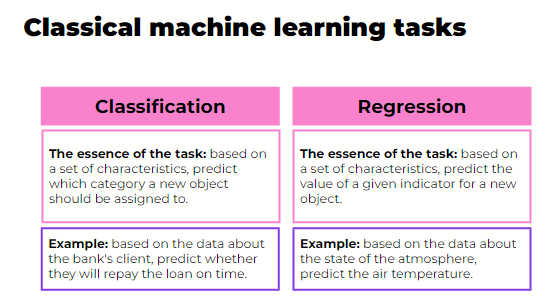

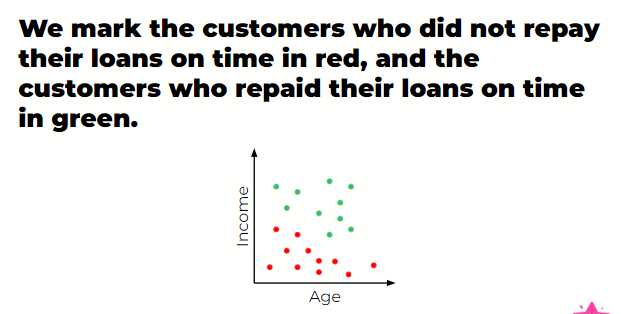

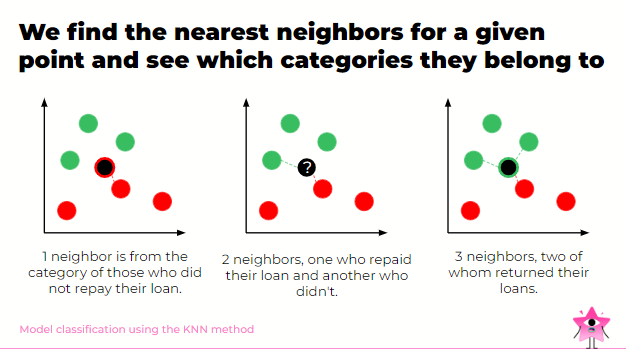

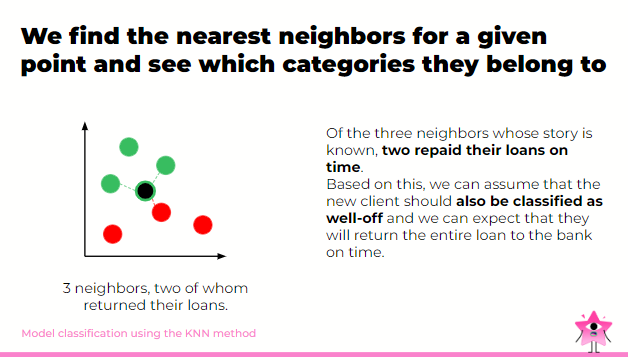

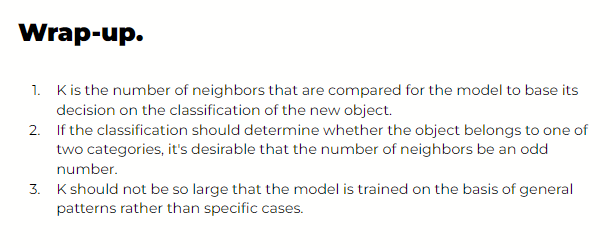

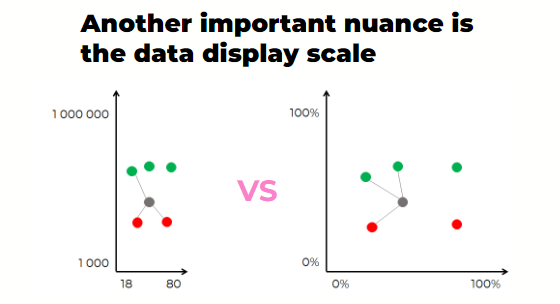

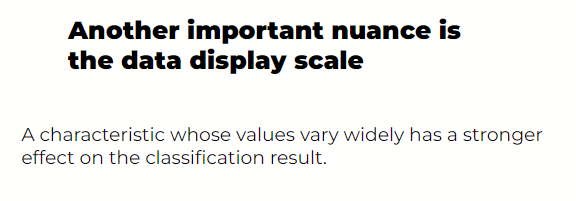

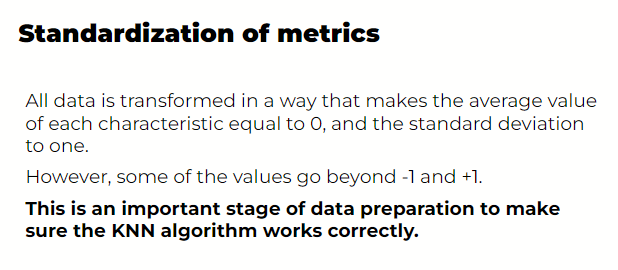

## Work Sequence

1. Divide the dataset into 2 parts:

- samples of the "correct" classification (for training the model);
- data that's "unknown" to the model (for testing).

2. Standardize the metrics in both datasets.
3. Create a KNN classifier object (we will use a ready-made tool). Configure the model parameters.
4. "Train" the model on the training dataset.
5. Calculate the predicted values of the target variable for the test dataset.
6. Evaluate the prediction accuracy.



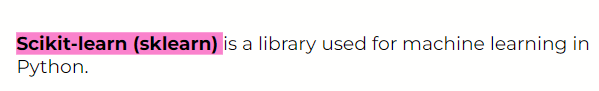

In [47]:
# A function for splitting the original dataset into samples
# for training and testing the model.
from sklearn.model_selection import train_test_split

# Class for standardizing metrics.
from sklearn.preprocessing import StandardScaler

# Class for creating and training the model. --> KNN
from sklearn.neighbors import KNeighborsClassifier

# Functions for evaluating the accuracy of the model.
from sklearn.metrics import confusion_matrix, accuracy_score

### 1. Divide the dataset into 2 parts.

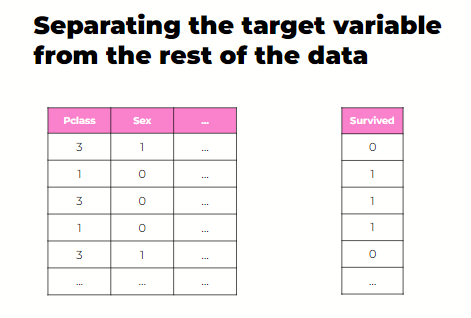

In [81]:
x = df.drop('Survived', axis = 1) # Passenger data
y = df['Survived'] # Target variable

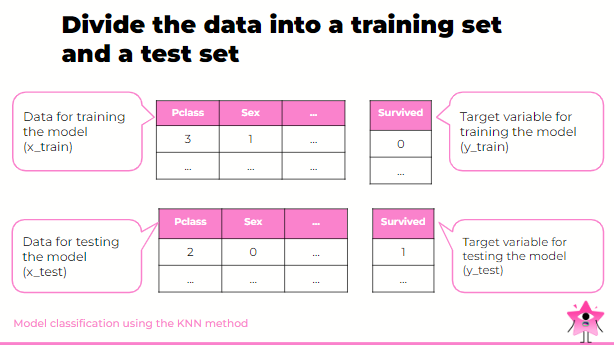

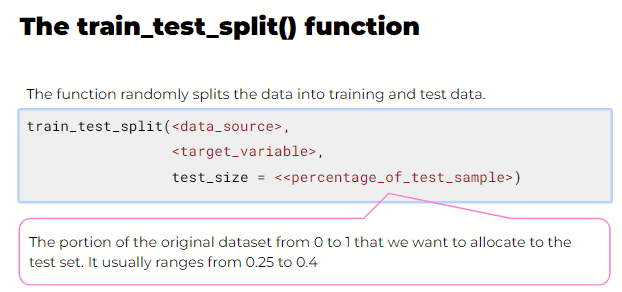

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# train = 80%
# test = 20%

In [49]:
# train 60% & test 40%
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

### 2. Standardize the metrics in both datasets.


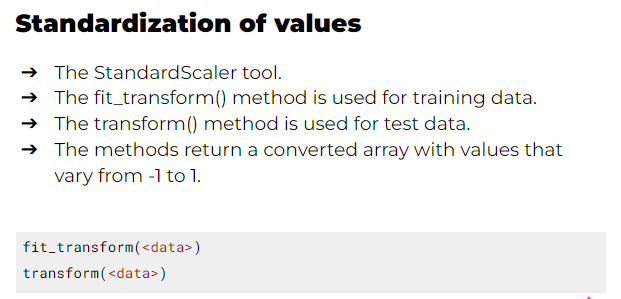

In [ ]:
sc = StandardScaler()
x_train = sc.

In [50]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### 3. Create a KNN classifier object. Configure the model parameters.

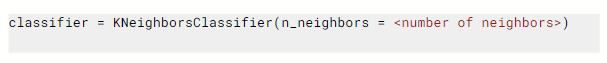

In [51]:
classifier = KNeighborsClassifier(n_neighbors = 3) # jumlah neighbours = 3

### 4. "Train" the model on the training dataset.


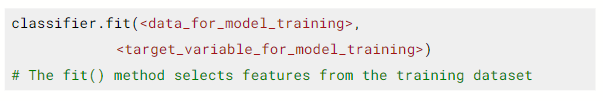

In [52]:
# classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 5. Calculate the predicted values of the target variable for the test dataset.
The predict() method predicts the value for the test data.



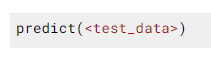

In [53]:
y_pred = classifier.predict(x_test)

### 6. Evaluate the prediction accuracy.
Based on the X_test data, the values recorded in y_pred were predicted.


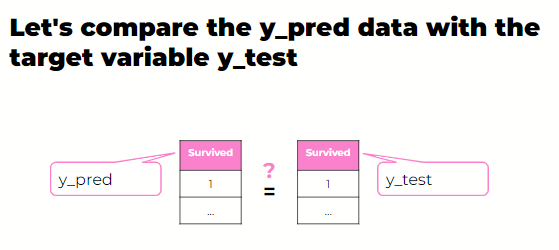

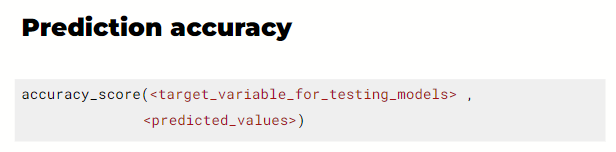

In [54]:
percent = accuracy_score(y_test, y_pred) * 100

print(percent)

79.82062780269058


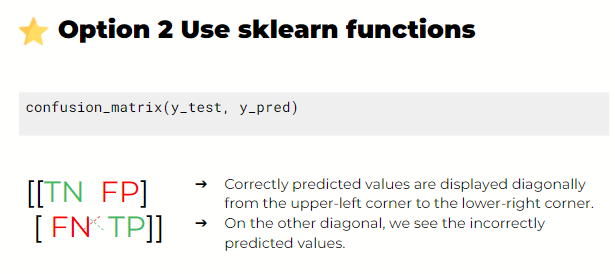

In [55]:
print(confusion_matrix(y_test, y_pred))

[[119  15]
 [ 30  59]]


# Example Solution

In [56]:
#write your code here

import pandas as pd

# Step 1. Loading and cleaning data
df = pd.read_csv('titanic.csv')
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df['Embarked'].fillna('S', inplace = True)
df.drop('Embarked', axis = 1, inplace = True)

age_1 = df[df['Pclass'] == 1]['Age'].median()
age_2 = df[df['Pclass'] == 2]['Age'].median()
age_3 = df[df['Pclass'] == 3]['Age'].median()

def fill_age(row):
   if pd.isnull(row['Age']):
       if row['Pclass'] == 1:
           return age_1
       if row['Pclass'] == 2:
           return age_2
       return age_3
   return row['Age']

df['Age'] = df.apply(fill_age, axis = 1)

def fill_sex(sex):
    if sex == 'male':
        return 1
    return 0

df['Sex'] = df['Sex'].apply(fill_sex)

# Step 2. Creating a model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print('Percentage of correctly predicted outcomes:', accuracy_score(y_test, y_pred) * 100)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Percentage of correctly predicted outcomes: 78.47533632286996
Confusion matrix:
[[118  16]
 [ 32  57]]
